In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

%matplotlib inline

#Read File
data = pd.read_csv('bmarathon.csv')
data.columns = ['Division', 'Name', 'City', 'Gender', 'Age', 'Official', 'Bib', 'Overall', 'State', 'Genderdiv', 'Net', 'Country']
#data = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)
# Number of rows and columns
print(data.shape)

#data.dropna(inplace=True)
data.head(10)

(22719, 12)


,Division,Name,City,Gender,Age,Official,Bib,Overall,State,Genderdiv,Net,Country
0,1 / 22,"Van Dyk, Ernst",Paarl,M,37,86.88,W1,1 / 29,NaN,1 / 24,NaN,RSA
1,3 / 4660,"Merga, Deriba",Addis Ababa,M,29,128.65,1,3 / 22672,NaN,3 / 13120,NaN,ETH
2,3 / 4996,"Kosgei, Salina",Eldoret,F,33,148.58,F1,58 / 22672,NaN,3 / 9552,NaN,KEN
3,2 / 22,"Schabort, Krige",Cedartown,M,46,86.93,W2,2 / 29,GA,2 / 24,NaN,USA
4,4 / 22,"Masazumi, Soejima",Fukuoka,M,39,88.10,W3,4 / 29,NaN,4 / 24,NaN,JPN
5,4 / 4660,"Hall, Ryan",Mammoth Lakes,M,27,128.68,3,4 / 22672,CA,4 / 13120,NaN,USA
6,14 / 4996,"Perez, Madai",Tlaxcala,F,30,156.07,F3,136 / 22672,NaN,14 / 9552,NaN,MEX
7,5 / 22,"Puigbo, Roger",Sant Julia De Vilatorta,M,32,88.42,W4,5 / 29,NaN,5 / 24,NaN,ESP
8,1 / 4996,"Erkesso, Teyba",Arsi,F,27,146.18,F4,42 / 22672,NaN,1 / 9552,NaN,ETH
9,21 / 4660,"Yegon, Gilbert",Eldoret,M,21,141.20,5,22 / 22672,NaN,22 / 13120,NaN,KEN


# Explore Data

In [12]:
for i in data.columns:
    print(data[i].value_counts())

1        / 1       3
1490     / 1870    1
437      / 1550    1
2277     / 4996    1
1027     / 1118    1
409      / 4660    1
136      / 1692    1
1585     / 4660    1
1239     / 1692    1
3033     / 4996    1
2604     / 4660    1
2693     / 4660    1
3802     / 4996    1
1770     / 4996    1
1568     / 1870    1
347      / 4996    1
2959     / 4660    1
29       / 217     1
565      / 785     1
562      / 633     1
1085     / 2389    1
3336     / 4996    1
335      / 335     1
673      / 1118    1
2304     / 4996    1
1178     / 1692    1
764      / 4660    1
2145     / 4660    1
1422     / 2389    1
1566     / 4996    1
                  ..
697      / 4660    1
1596     / 1870    1
816      / 1692    1
3975     / 4996    1
461      / 4660    1
2533     / 4996    1
2496     / 4660    1
374      / 785     1
1806     / 2389    1
1900     / 4660    1
6        / 335     1
346      / 2389    1
1620     / 4996    1
2860     / 4996    1
2950     / 4660    1
2218     / 2389    1
3545     / 46

21672

Here we can tell that Genderdiv, Division and Bib all have only one instance. Therefore they won't add much to our data and can be dropped.

In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21672 entries, 3 to 22718
Data columns (total 11 columns):
Division     21672 non-null object
Name         21672 non-null object
City         21672 non-null object
Gender       21672 non-null object
Age          21672 non-null int64
Official     21672 non-null float64
Bib          21672 non-null object
Overall      21672 non-null object
State        21672 non-null object
Genderdiv    21672 non-null object
Country      21672 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 2.0+ MB
None


In [2]:
#Drop net since it only contains NaNs
data.isna().sum()

Division         0
Name             0
City             0
Gender           0
Age              0
Official         0
Bib              0
Overall          0
State         1047
Genderdiv        0
Net          22719
Country          0
dtype: int64

In [3]:
#Drop Net column, which only contains NaNs
data.drop(['Net'], axis=1, inplace=True)
#Drops states with NaNs
data.dropna(inplace=True)
#Re-check to see if we have NaNs
data.isna().sum()

Division     0
Name         0
City         0
Gender       0
Age          0
Official     0
Bib          0
Overall      0
State        0
Genderdiv    0
Country      0
dtype: int64

In [23]:
X = data[['Age', 'Official']]
y = data.iloc[:, 10]
print(X)
print(y)

       Age  Official
3       46     86.93
5       27    128.68
18      23     98.28
22      26     95.73
24      34     98.02
27      39     98.25
28      34    105.07
31      53    101.47
34      21    103.03
37      48    113.22
38      28    162.63
40      27    102.88
41      34    129.43
42      43    118.52
45      51    107.88
47      43    108.87
48      39    172.13
49      32    132.40
50      45    132.87
51      27    156.00
53      51    140.88
54      29    159.23
56      32    153.45
57      42    178.95
58      33    158.20
59      29    110.65
60      38    160.77
61      26    133.78
62      33    164.02
64      25    160.27
...    ...       ...
22688   41    255.45
22689   42    255.47
22690   44    258.15
22691   22    259.08
22692   46    282.08
22693   30    278.63
22694   38    241.02
22695   42    214.25
22696   41    223.80
22697   59    302.37
22698   23    247.05
22699   44    230.95
22700   29    256.77
22701   47    249.62
22702   33    248.42
22703   45   

In [ ]:
# Normalize the data.
# Important to normalize so our clustering models do not favor any one particular data point.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

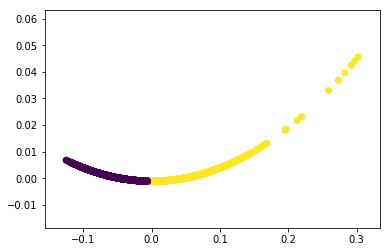

Comparing k-means clusters against the data:
Country   CAN    USA
row_0               
0         541   9291
1        1622  10218


In [24]:
from sklearn.cluster import KMeans
# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Number of estimated clusters: 3


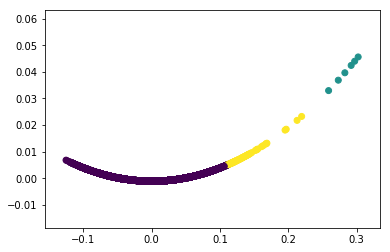

Comparing the assigned categories to the ones in the data:
col_0        0  1   2
Country              
CAN       2140  0  23
USA      19417  6  86


In [26]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_pca)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y,labels))

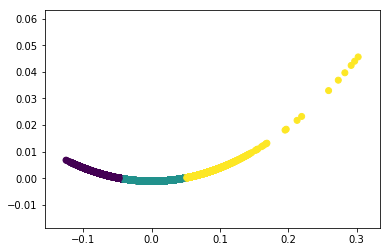

Comparing the assigned categories to the ones in the data:
col_0       0      1     2
Country                   
CAN       117   1581   465
USA      4319  12313  2877


In [27]:
from sklearn.cluster import SpectralClustering

# Look for 3 clusters
n_clusters=3

# Create SpectralClustering model, with n_clusters
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_pca)

#create our prediction.
predict=sc.fit_predict(X_pca)

#Graph results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y,predict))

In [29]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
af = AffinityPropagation().fit(X_pca)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 21423
